In [1]:
import pandas as pd
import time
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait

**1.** Write a python program which searches all the product under a particular product from 
www.amazon.in. The product name to be searched will be taken as input from user. For e.g. If 
user input is ‘guitar’. Then search for guitars.

**2.** In the above question, now scrape the following details of each product listed in first 3 pages 
of your search results and save it in a dataframe and csv. In case if any product vertical has 
less than 3 pages in search results then scrape all the products available under that product 
vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of 
Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" 
and “Product URL”. In case, if any of the details are missing for any of the product then 
replace it by “-“

In [2]:
price=[]
Titles=[]
Expected_Delivery=[]
Ratings=[]
Total_saved=[]
Product_url=[]
input_=input('Name of the Product you want to scrape ')
url = 'https://www.amazon.in/'
driver = webdriver.Chrome(r'C:\\driver.exe')
driver.get(url)
sc=driver.find_element_by_xpath("//input[@id='twotabsearchtextbox']")
sc.send_keys(input_)
sc.send_keys(Keys.RETURN)

for i in range(0,2):
    for j in driver.find_elements_by_xpath("//span[@class='a-price-whole']"):
        price.append(j.text)
    for j in driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']"):
        Titles.append(j.text)
    for j in  driver.find_elements_by_xpath("//span[@class='a-text-bold']"):
        Expected_Delivery.append(j.text)
    for j in driver.find_elements_by_xpath("//span[@class='a-size-base']"):
        Ratings.append(j.text)
    for j in driver.find_elements_by_xpath("//span[@class='a-letter-space']"):
        Total_saved.append(j.text)
    elements=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    for element in elements:
        #get href
        href = element.get_attribute('href')
        Product_url.append(href)
    time.sleep(5)
    url=driver.find_element_by_xpath("//li[@class='a-last']/a").get_attribute("href")
    driver.get(url)
time.sleep(6)
driver.quit()

Name of the Product you want to scrape sshampoo


In [16]:
data={'Brands':Titles,'Price':price,'Expected Delivery':Expected_Delivery,'Ratings':Ratings,'Discount':Total_saved,'Product Links':Product_url,}
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()
user_input=input("Save The CSV File As ")
df.to_csv(user_input,index=False)

Save The CSV File As Amazone_Scraped_csv


In [17]:
df.head(20)

,Brands,Price,Expected Delivery,Ratings,Discount,Product Links
0,"L'Oreal Paris Dream Lengths Shampoo, 704 ml",434,"Tomorrow, April 28",743,,https://aax-eu.amazon.in/x/c/QoUdC7F2Mm_EBnH_y...
1,"Moroccanoil Moisture Repair Shampoo, Blue, 250 ml","1,710","Sunday, May 2","5,245",,https://www.amazon.in/Moroccanoil-Moisture-Rep...
2,Kerastase Discipline Bain Fluidealiste Shampoo...,"2,770","Friday, April 30",872,,https://www.amazon.in/Discipline-Kerastase-Flu...
3,,,"Tomorrow, April 28",,,https://www.amazon.in/Schwarzkopf-Professional...
4,,,"Friday, April 30",,,https://www.amazon.in/Herbal-Essences-bio-Whip...
5,,,"Saturday, May 1",,,https://www.amazon.in/Herbal-Essence-Morocco-S...
6,L'Oréal Professionnel Serie Expert Absolut Rep...,"1,260","Friday, April 30","1,035",,https://www.amazon.in/gp/slredirect/picassoRed...
7,Dove Hair Fall Rescue Shampoo For Weak Hair Pr...,518,"Tomorrow, April 28","8,217",,https://www.amazon.in/gp/slredirect/picassoRed...
8,Sunsilk Stunning Black Shine Shampoo 1 ltr,375,"Sunday, May 2","2,159",,https://www.amazon.in/gp/slredirect/picassoRed...
9,"L'Oreal Paris Dream Lengths Shampoo, 704 ml",434,"Tomorrow, April 28",743,,https://www.amazon.in/gp/slredirect/picassoRed...


**3.** Write a python program to access the search bar and search button on images.google.com and 
scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.


In [18]:
Fruits=[]
input_=input('Name of the Product you want to scrape ')
url='https://images.google.com/'
driver=webdriver.Chrome('C://driver.exe')
driver.get(url)
sc=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
sc.send_keys(input_)
sc.send_keys(Keys.RETURN)

img_links=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for img_link in img_links[0:100]:
    src=img_link.get_attribute('src')
    Fruits.append(src)
    time.sleep(3)
time.sleep(20)
driver.quit()

Cars=[]
input_=input('Name of the Product you want to scrape ')
url='https://images.google.com/'
driver=webdriver.Chrome('C://driver.exe')
driver.get(url)
sc=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
sc.send_keys(input_)
sc.send_keys(Keys.RETURN)

img_links=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for img_link in img_links[0:100]:
    src=img_link.get_attribute('src')
    Cars.append(src)
    time.sleep(3)
time.sleep(20)
driver.quit()

Machine_learning=[]
input_=input('Name of the Product you want to scrape ')
url='https://images.google.com/'
driver=webdriver.Chrome('C://driver.exe')
driver.get(url)
sc=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
sc.send_keys(input_)
sc.send_keys(Keys.RETURN)

img_links=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for img_link in img_links[0:100]:
    src=img_link.get_attribute('src')
    Machine_learning.append(src)
    time.sleep(3)
time.sleep(20)
driver.quit()



Name of the Product you want to scrape fruits
Name of the Product you want to scrape cars
Name of the Product you want to scrape Machine learning


In [25]:
dict_={'Img1':Fruits[2],'Img2':Cars[2],'Img3':Machine_learning[2]}

{'Img1': '',
 'Img2': '',
 'Img3': ''}
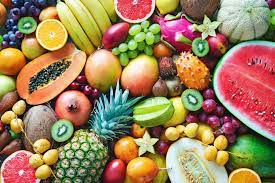
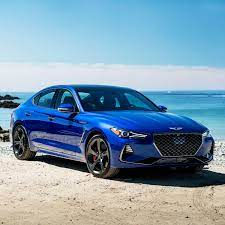
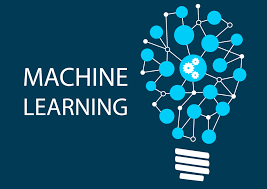

In [26]:
dict_

**4.** Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on 
www.flipkart.com and scrape following details for all the search results displayed on 1st page. 
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, 
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display 
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. 
Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe 
and CSV.


In [27]:
Brands_names_color=[]
Ram_rom=[]
Phone_size_and_resolution=[]
camera_rare_font=[]
battery=[]
Processer=[]
Price=[]
Product_url=[]
input_=input('Name of the product that you want to seacrch for ')
url='https://www.flipkart.com'
driver=webdriver.Chrome(r'C://driver.exe')
driver.get(url)
sc=driver.find_element_by_xpath("//input[@class='_3704LK']")
sc.send_keys(input_)
sc.send_keys(Keys.RETURN)
a=[]
b=[]
c=[]
d=[]
try:

    brand = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, "//div[@class='_4rR01T']"))
    )
    for i in brand:
        a.append(i.text)
    time.sleep(3)
    price= WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH,"//div[@class='_30jeq3 _1_WHN1']"))
    )
    for i in price:
        b.append(i.text)
    
    elements = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH,"//div[@class='fMghEO']"))
    )
    for i in elements:
        c.append(i.text)
except:
    names=driver.find_elements_by_xpath("//a[@class='s1Q9rs']")
    price=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
    for i in names:
        Brands_names_color.append(i.text)
    for i in price:
        Price.append(i.text)
time.sleep(5)
driver.quit()

Name of the productredmi note 10


In [28]:
df=pd.DataFrame({"Brands&Colour":a,'Price':b,'Full Specifications':c})
ipt=input('name the csv you want to give ')
df.to_csv(ipt,index=False)

name the csvflipkart-scraped-csv


In [29]:
df

,Brands&Colour,Price,Full Specifications
0,"REDMI Note 10 (Frost White, 64 GB)","₹13,999",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB\...
1,"REDMI Note 10 (Aqua Green, 64 GB)","₹13,990",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB\...
2,"REDMI Note 10 (Shadow Black, 64 GB)","₹13,429",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB\...
3,"REDMI Note 10 (Shadow Black, 128 GB)","₹15,390",6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
4,"REDMI Note 10 (Frost White, 128 GB)","₹15,500",6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
5,"REDMI Note 10 (Aqua Green, 128 GB)","₹15,399",6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
6,"REDMI Note 10 (Frost White, 64 GB)","₹14,499",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB\...
7,"REDMI Note 10 (Frost White, 128 GB)","₹16,999",4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
8,"REDMI Note 10 (Shadow Black, 128 GB)","₹17,996",4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
9,"REDMI Note 10 (Shadow Black, 64 GB)","₹16,999",6 GB RAM | 64 GB ROM | Expandable Upto 512 GB\...


**7.** Write a program to scrap all the available details of top 10 gaming laptops from digit.in. 

In [31]:
from autoscraper import AutoScraper

In [32]:
url='https://www.digit.in/top-products/best-gaming-laptops-40.html'
elements_needed=['17.3" (UHD 3840X2160)','INTEL 9TH GEN CORE I9-9900K | 5000 MHZ','1 TB HDD/64 GBGB DDR4','NVIDIA GeForce RTX 2080','₹379990','	4.2 kg','']
scraper=AutoScraper()
data=scraper.build(url,elements_needed)

In [33]:
data

['Windows 10 Pro',
 '17.3" (UHD 3840x2160)',
 'Intel 9th Gen Core i9-9900K | 5000 MHz',
 '1 TB HDD/64 GBGB DDR4',
 '4.2 kg',
 '397 x 330 x 33~42 mm',
 'NVIDIA GeForce RTX 2080',
 '₹379990',
 '17.3" (FHD (1920 x 1080))',
 '1 TB PCIe SSD/32GB DDR4',
 '3.87 Kg',
 '42 mm x 402.6 mm x 319.14 mm',
 'Windows 10 Home',
 '15.6" (1920 x 1080)',
 'Intel i7-10750H 10th Gen | 1.6GHz',
 '512 GB SSD/16 GBGB DDR4',
 '5.40',
 '14.09 x 9.44 x 0.89',
 'Nvidia GeForce GTX 1650Ti',
 '14" (1920 x 1080)',
 'AMD 3rd Generation Ryzen 9 | 3.3 GHz',
 '1 TB SSD/16 GBGB DDR4',
 '1.65',
 '32.5 x 22.1 x 1.8',
 'NVIDIA GeForce RTX 2060',
 '15.6" (1920 X 1080)',
 '9th Generation Core Intel I7-9750H | 2.6 Ghz',
 '1 TB SSD/8GB DDR4',
 '2.3',
 '365mm x 260mm x 25.9mm',
 'NVIDIA® GeForce RTXTM 2060',
 'AMD Ryzen 7 Quad Core 3750H | 2.3 GHz',
 '512 GB SSD/16GB DDR4',
 '2.2',
 '360 x 252 x 20.4',
 'NVIDIA Geforce GTX 1660 Ti',
 '9th Gen Intel Core i7-8750H | 2.2 GHz',
 '512GB SSD/16 GBGB DDR4',
 '2.1',
 '360 (W) x 268 (D) x